In [53]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Dropout
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


## Loading Data

### Spacy Embeddings

In [2]:
embeddings = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_embeddings.npy')
labels = np.load('/home/sanjaycollege15/PredictingDiagnoses/Data/ekg_denoised_CORe_labels.npy')


### Train/Dev/Test/Split

In [3]:
train_X, test_X, train_y, test_y = train_test_split(embeddings, labels, test_size=0.20, random_state=42)
del embeddings
del labels

In [4]:
train_X.shape

(4000, 264, 768)

In [52]:
test_X.shape

(1000, 264, 768)

## Simple RNN Model

In [64]:
inputs = tf.keras.layers.Input(shape=(264,768))
hidden_layer_1 = tf.keras.layers.Dense(700, activation='relu')(inputs)
dropout1 = tf.keras.layers.Dropout(0.2)(hidden_layer_1)
RNN = tf.keras.layers.SimpleRNN(100)(dropout1)
classification_out = tf.keras.layers.Dense(4, activation='softmax')(RNN)

model = tf.keras.models.Model(inputs=inputs, outputs=classification_out)
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), 
              optimizer='adam', 
              metrics=['accuracy'])

In [65]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 264, 768)]        0         
                                                                 
 dense_19 (Dense)            (None, 264, 700)          538300    
                                                                 
 dropout_7 (Dropout)         (None, 264, 700)          0         
                                                                 
 simple_rnn_14 (SimpleRNN)   (None, 100)               80100     
                                                                 
 dense_20 (Dense)            (None, 4)                 404       
                                                                 
Total params: 618,804
Trainable params: 618,804
Non-trainable params: 0
_________________________________________________________________


In [66]:
train = model.fit(train_X, train_y, epochs=20, batch_size=512, validation_split=0.2)


Epoch 1/20
7/7 [==============================] - 12s 1s/step - loss: 1.9141 - accuracy: 0.2653 - val_loss: 1.5233 - val_accuracy: 0.2587
Epoch 2/20
7/7 [==============================] - 9s 1s/step - loss: 1.4422 - accuracy: 0.2766 - val_loss: 1.4102 - val_accuracy: 0.2875
Epoch 3/20
7/7 [==============================] - 9s 1s/step - loss: 1.3900 - accuracy: 0.2928 - val_loss: 1.4080 - val_accuracy: 0.2475
Epoch 4/20
7/7 [==============================] - 9s 1s/step - loss: 1.3701 - accuracy: 0.3122 - val_loss: 1.3882 - val_accuracy: 0.3013
Epoch 5/20
7/7 [==============================] - 9s 1s/step - loss: 1.3521 - accuracy: 0.3300 - val_loss: 1.3851 - val_accuracy: 0.2788
Epoch 6/20
7/7 [==============================] - 9s 1s/step - loss: 1.3398 - accuracy: 0.3422 - val_loss: 1.3853 - val_accuracy: 0.2962
Epoch 7/20
7/7 [==============================] - 9s 1s/step - loss: 1.3215 - accuracy: 0.3694 - val_loss: 1.3865 - val_accuracy: 0.2612
Epoch 8/20
7/7 [========================

In [67]:
model.evaluate(test_X, test_y)

32/32 [==============================] - 1s 43ms/step - loss: 1.6077 - accuracy: 0.2530


[1.607657790184021, 0.2529999911785126]

Very poor accuracy (25% would be random chance). Even with the updated dataset, Spacy performs more poorly than the TF-IDF set. Could also be that the RNN model isn't very good. 

## Plotting

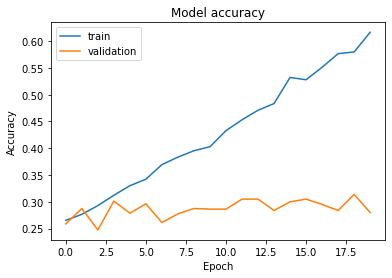

In [68]:
plt.plot(train.history['accuracy'])
plt.plot(train.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()